## Schrodinger's Equation

In this module...

In [84]:
import numpy
from scipy.linalg import solve
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [85]:
def generateMatrix(N, sigma):
    
    # Set Diagonalfrom discritization
    d = numpy.diag(numpy.ones(N-2)*(1+2j/sigma))
       
    # Set Upper Diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Set Lower Diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A                   

In [86]:
#This is what we know

def genRHS(psi, sigma): 
    
    x = psi[1:-1]*((2j/sigma)+1) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] += psi[0]
    x[-1] += psi[0]
    
    return x

In [87]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psin = psi.copy()
        x = genRHS(psin, sigma)
        
        psi_interior = solve(A, x)
        psi[1:-1] = psi_interior
        
    return psi

In [88]:
L = 1
nx = 21 #21

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
m = 6.6464764063e-27 #[kg] - mass of Helium ion
dx = L/(nx-1)


psii = numpy.zeros(nx, dtype = numpy.complex)
psii[0] = 1

sigma = 0.7 #0.5
dt = sigma*(dx**2)*m/hbar
nt = 10

A = generateMatrix(nx, sigma)

print(dt)

110294.3745460543


In [89]:
#print(A)

In [90]:
psi = CrankNicolson(psii.copy(), A, nt, sigma)

In [91]:
x = numpy.linspace(0,L,nx)

#pyplot.plot(x, psi, color='#003366', ls='-', lw=3);

In [92]:
#print(psi)

In [93]:
psi_conj = numpy.conj(psi)
probfunc = psi*psi_conj

#print(psi_conj)
#print()
print(probfunc)
probfunc_real = probfunc.real
print(probfunc_real)

[ 1.00000000+0.j  1.18008998+0.j  2.56997771+0.j  2.46333205+0.j
  0.51989581+0.j  0.37980237+0.j  2.16213069+0.j  7.32379423+0.j
  7.13528788+0.j  4.15663030+0.j  9.63120069+0.j  1.33084647+0.j
  2.72149811+0.j  3.34556144+0.j  0.19421669+0.j  0.16310902+0.j
  0.14595705+0.j  0.70550987+0.j  0.60116499+0.j  0.30173418+0.j
  0.00000000+0.j]
[ 1.          1.18008998  2.56997771  2.46333205  0.51989581  0.37980237
  2.16213069  7.32379423  7.13528788  4.1566303   9.63120069  1.33084647
  2.72149811  3.34556144  0.19421669  0.16310902  0.14595705  0.70550987
  0.60116499  0.30173418  0.        ]


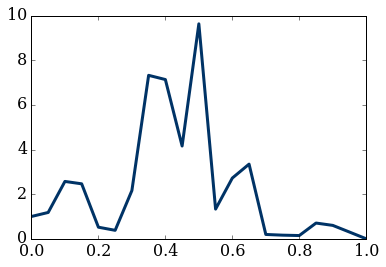

In [94]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);


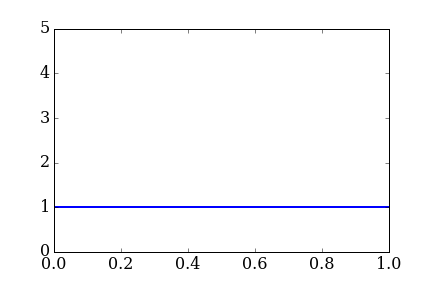
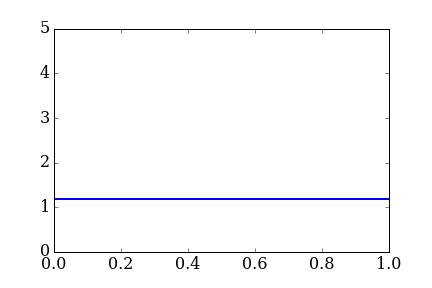
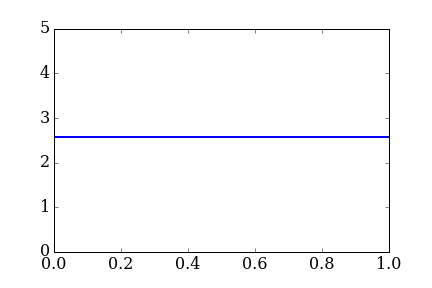
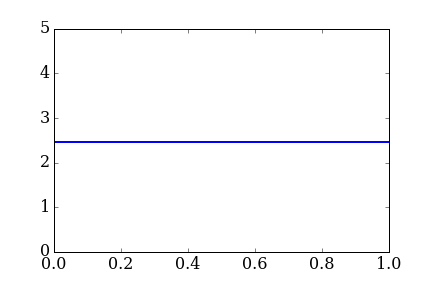
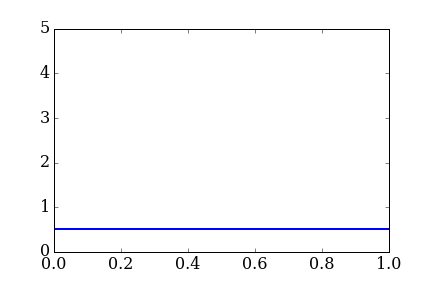
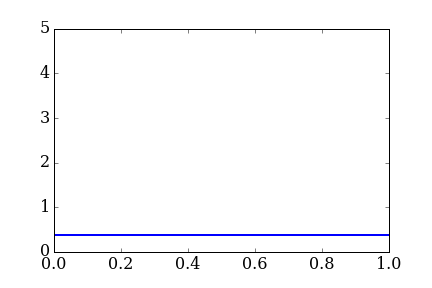
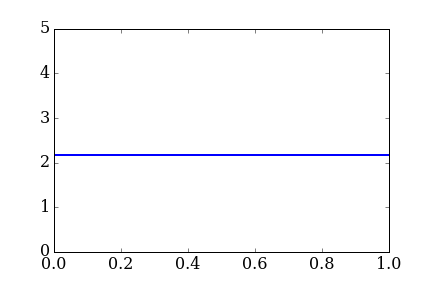
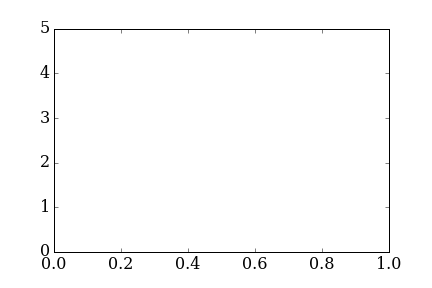
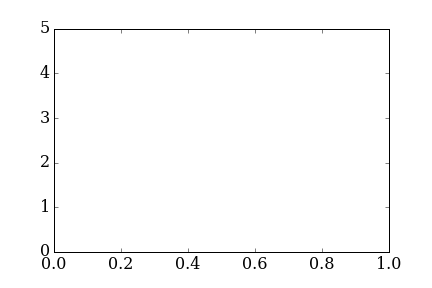
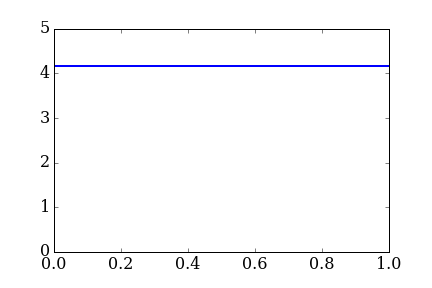
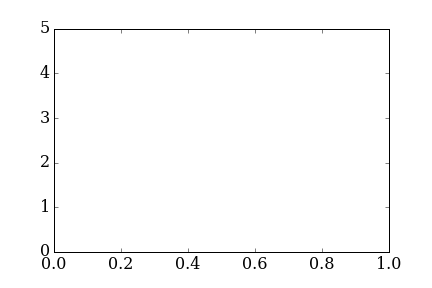
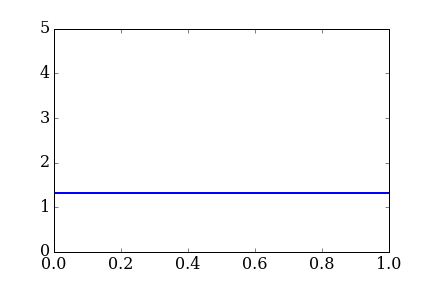
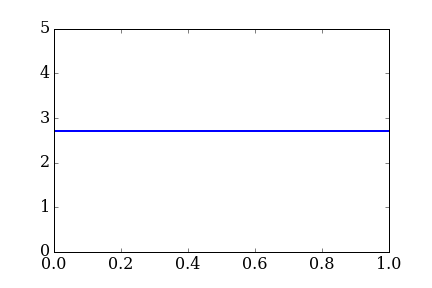
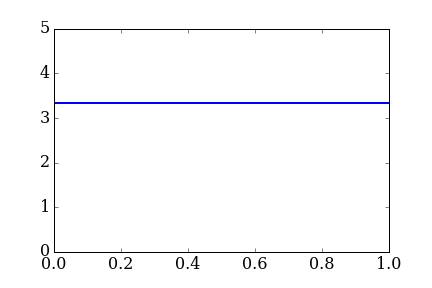
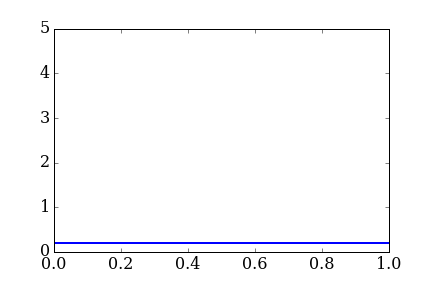
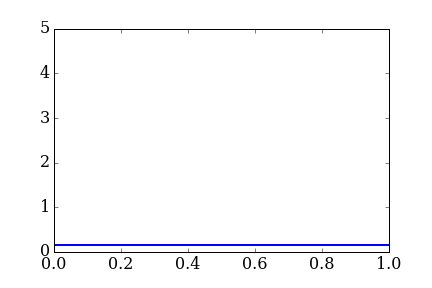
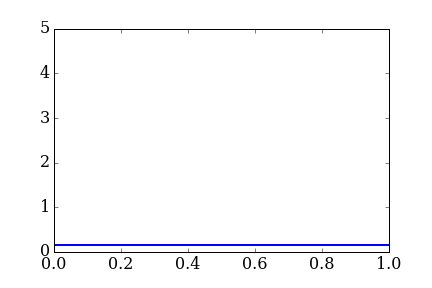
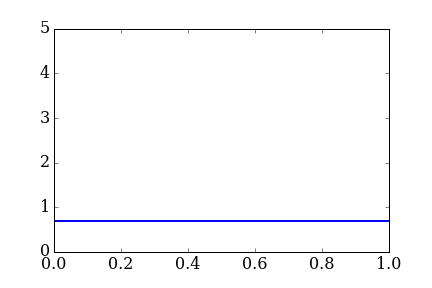
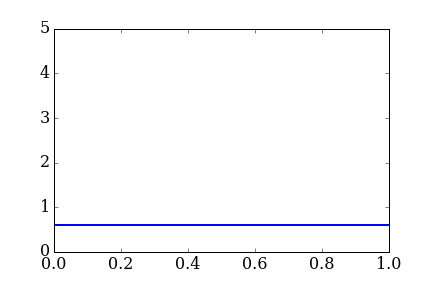
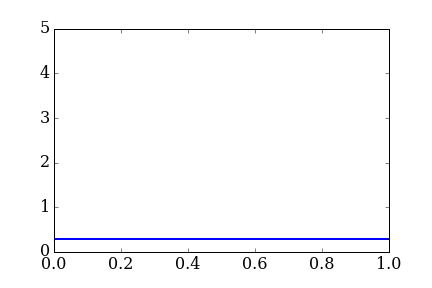
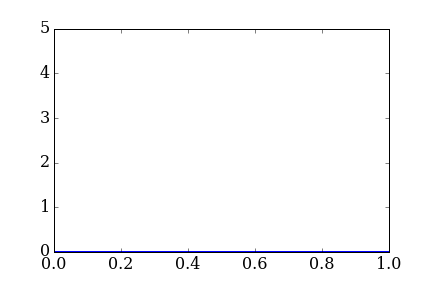

In [95]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (0,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = probfunc_real, interval = 50)

display_animation(anim, default_mode = 'once')


In [96]:
from IPython.core.display import HTML
css_file = 'numericalmoocstyle.css'
HTML(open(css_file, "r").read())